<a target="_blank" href="https://colab.research.google.com/github/skojaku/adv-net-sci/blob/main/notebooks/exercise-m06-centrality.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Computing centrality with Python

## Network of university students

Let's compute the centrality of the network using Python igraph.

In [1]:
# Uncomment if you use Colab
#!pip install igraph

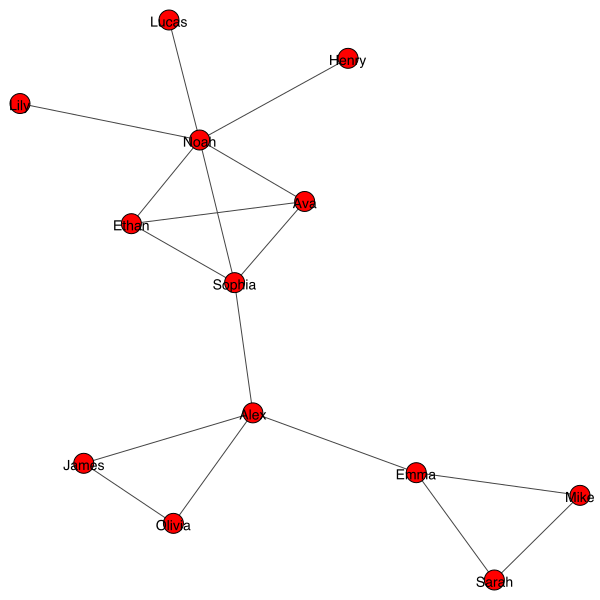

In [2]:
import igraph
names  = ['Sarah', 'Mike', 'Emma', 'Alex', 'Olivia', 'James', 'Sophia', 'Ethan', 'Ava', 'Noah', 'Lily', 'Lucas', 'Henry']
edge_list = [(0, 1), (0, 2), (1, 2), (2, 3), (3, 4), (3, 5), (3, 6), (4, 5), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9), (9, 10), (9, 11), (9, 12)]
g = igraph.Graph()
g.add_vertices(13)
g.vs["name"] = names
g.add_edges(edge_list)
igraph.plot(g, vertex_label=g.vs["name"])

`igraph` offers a wide range of centrality measures as methods of the `igraph.Graph` class.

- **Degree centrality**: `igraph.Graph.degree()`
- **Closeness centrality**: `igraph.Graph.closeness()`
- **Betweenness centrality**: `igraph.Graph.betweenness()`
- **Harmonic centrality**: `igraph.Graph.harmonic_centrality()`
- **Eccentricity**: `igraph.Graph.eccentricity()`
- **Eigenvector centrality**: `igraph.Graph.eigenvector_centrality()`
- **PageRank centrality**: `igraph.Graph.personalized_pagerank()`

For example, the closeness centrality is computed by

In [3]:
g.closeness()

[0.3,
 0.3,
 0.4,
 0.5217391304347826,
 0.36363636363636365,
 0.36363636363636365,
 0.5454545454545454,
 0.42857142857142855,
 0.42857142857142855,
 0.48,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333]

### Computing Katz centrality

Let's compute the Katz centrality without using igraph.
Let us first define the adjacency matrix of the graph

In [4]:
A = g.get_adjacency_sparse()

which is the scipy CSR sparse matrix. The Katz centrality is given by

$$

\mathbf{c} = \beta \mathbf{1} + \alpha \mathbf{A} \mathbf{c}

$$

So, how do we solve this? We can use a linear solver but here we will use a simple method:

1. Initialize $\mathbf{c}$ with a random vector.
2. Compute the right hand side of the equation and update $\mathbf{c}$.
3. Repeat the process until $\mathbf{c}$ converges.

Let's implement this.

In [5]:
import numpy as np

alpha, beta = 0.1, 0.05 # Hyperparameters
n_nodes = g.vcount() # number of nodes
c = np.random.rand(n_nodes, 1) # column random vector

for _ in range(100):
    c_next = beta * np.ones((n_nodes, 1)) + alpha * A * c
    if np.linalg.norm(c_next - c) < 1e-6:
        break
    c = c_next
print(c)

[[0.06338729]
 [0.06338729]
 [0.07048543]
 [0.07807919]
 [0.06423108]
 [0.06423108]
 [0.08184311]
 [0.07474497]
 [0.07474497]
 [0.0908594 ]
 [0.05908602]
 [0.05908602]
 [0.05908602]]


- Does the centrality converge?
- Change the hyperparameter and see how the result changes 😉
If the centrality diverges, think about why it diverges.

*Hint*: Katz centrality can be analytically computed by

$$

\mathbf{c} = \beta \left(\mathbf{I} -  \alpha \mathbf{A} \right)^{-1} \mathbf{1}

$$

### Exercise (Optional)

Compute the PageRank centrality of this graph

## Network of ancient Roman roads

### Load the data & construct the network

In [6]:
import pandas as pd

root = "https://raw.githubusercontent.com/skojaku/adv-net-sci/main/data/roman-roads"
node_table = pd.read_csv(f"{root}/node_table.csv")
edge_table = pd.read_csv(f"{root}/edge_table.csv")

The node table:

In [7]:
node_table.head(3)

,node_id,lon,lat
0,0,12.506,41.875
1,1,12.470,41.904
2,2,12.471,41.881


The edge table:

In [8]:
edge_table.head(3)

,src,trg
0,1785,358
1,1785,1771
2,1771,350


Let's construct a network from the node and edge tables.

In [9]:
import igraph

g = igraph.Graph() # create an empty graph
g.add_vertices(node_table["node_id"].values) # add nodes
g.add_edges(list(zip(edge_table["src"].values, edge_table["trg"].values))) # add edges

which looks like this:

In [10]:
coord = list(zip(node_table["lon"].values, -node_table["lat"].values))
igraph.plot(g, layout = coord, vertex_size = 5)

### Exercise 🏛️

1. Compute the following centrality measures:
    - Degree centrality 🔢
    - Eigenvector centrality
    - PageRank centrality
    - Katz centrality
    - Betweenness centrality
    - Closeness centrality
2. Plot the centrality measures on the map and see in which centrality Rome is the most important node. 🗺️🏛️ (as beautiful as possible!!)


